## Medium Graph Testing GA

In [1]:
import os
import sys
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
sys.path.append(os.path.abspath(".."))
from src.utils import loading_graphs, plot_colored_graph
from src.optimizer import find_optimal_coloring

In [ ]:
path = "../data/david.col" 
graph = loading_graphs(path)


configurations = [
    {"id": 1, "pop": 100, "mut": 0.05, "elite": 2, "sel": "tournament", "cross": "uniform",   "mut_type": "smart"},
    {"id": 2, "pop": 100, "mut": 0.05, "elite": 2, "sel": "roulette",   "cross": "uniform",   "mut_type": "smart"},
    {"id": 3, "pop": 100, "mut": 0.05, "elite": 2, "sel": "tournament", "cross": "one_point", "mut_type": "smart"},
    {"id": 4, "pop": 100, "mut": 0.10, "elite": 2, "sel": "tournament", "cross": "uniform",   "mut_type": "random"},
    {"id": 5, "pop": 300, "mut": 0.30, "elite": 5, "sel": "tournament", "cross": "uniform",   "mut_type": "smart"},
    {"id": 6, "pop": 300, "mut": 0.05, "elite": 5, "sel": "roulette",   "cross": "one_point", "mut_type": "smart"},

    # Pruebas 2
    {"id": 7, "pop": 100, "mut": 0.30, "elite": 2, "sel": "tournament", "cross": "uniform",   "mut_type": "smart"}, # Subiendo la mutacion
    {"id": 8, "pop": 100, "mut": 0.05, "elite": 10, "sel": "tournament", "cross": "uniform",   "mut_type": "smart"}, # Subiendo la elite a 10%
    {"id": 9, "pop": 100, "mut": 0.1, "elite": 10, "sel": "tournament", "cross": "uniform",   "mut_type": "smart"}, # Subiendo los dos

    # Pruebas 3
    {"id": 10, "pop": 100, "mut": 0.2, "elite": 2, "sel": "tournament", "cross": "uniform",   "mut_type": "smart"}, # Bajandole 0.1
    {"id": 11, "pop": 100, "mut": 0.4, "elite": 2, "sel": "tournament", "cross": "uniform",   "mut_type": "smart"}, # Subiendola a 0.4
    {"id": 12, "pop": 100, "mut": 0.5, "elite": 2, "sel": "tournament", "cross": "uniform",   "mut_type": "smart"}, # Subiendola a 0.5
    {"id": 13, "pop": 100, "mut": 0.05, "elite": 5, "sel": "tournament", "cross": "uniform",   "mut_type": "smart"}, # Subiendo la elite un poco
    {"id": 14, "pop": 100, "mut": 0.3, "elite": 5, "sel": "tournament", "cross": "uniform",   "mut_type": "smart"}, # Subiendo los dos

    # Pruebas 4
    {"id": 15, "pop": 100, "mut": 0.6, "elite": 2, "sel": "tournament", "cross": "uniform",   "mut_type": "smart"}, # mut a 0.6
    {"id": 16, "pop": 100, "mut": 0.7, "elite": 2, "sel": "tournament", "cross": "uniform",   "mut_type": "smart"}, # mut a 0.7
    {"id": 17, "pop": 100, "mut": 0.5, "elite": 2, "sel": "roulette", "cross": "uniform",   "mut_type": "smart"}, # subiendole mut y cambiando sel
    {"id": 18, "pop": 100, "mut": 0.5, "elite": 2, "sel": "tournament", "cross": "one_point",   "mut_type": "smart"}, # lo mismo pero cambiando cross
    {"id": 19, "pop": 100, "mut": 0.5, "elite": 2, "sel": "roulette", "cross": "one_point",   "mut_type": "smart"}, # subiendole mut y cambiando los dos

    # Pruebas 5
    {"id": 20, "pop": 100, "mut": 0.8, "elite": 2, "sel": "tournament", "cross": "uniform",   "mut_type": "smart"}, # mut a 0.8
    {"id": 21, "pop": 100, "mut": 0.9, "elite": 2, "sel": "tournament", "cross": "uniform",   "mut_type": "smart"}, # mut a 0.9
    {"id": 22, "pop": 100, "mut": 1, "elite": 2, "sel": "tournament", "cross": "uniform",   "mut_type": "smart"}, # mut a 1
    {"id": 23, "pop": 100, "mut": 0.7, "elite": 2, "sel": "tournament", "cross": "one_point",   "mut_type": "smart"}, # Pruebas con cross one point subiendole la mut
    {"id": 24, "pop": 100, "mut": 0.8, "elite": 2, "sel": "tournament", "cross": "one_point",   "mut_type": "smart"},
    {"id": 25, "pop": 100, "mut": 0.9, "elite": 2, "sel": "tournament", "cross": "one_point",   "mut_type": "smart"},
    {"id": 26, "pop": 100, "mut": 1, "elite": 2, "sel": "tournament", "cross": "one_point",   "mut_type": "smart"},

]

results = []
best_solution_overall = None
min_k_global = float('inf')

Medium Graph Loaded
Nodes: 87
Edges: 406


In [21]:
for config in configurations:
    start_time = time.time()
    
    genes, k_found, history = find_optimal_coloring(
        graph,
        start_colors=20,
        optimal_solution=11,
        pop_size=config["pop"],
        mutation_rate=config["mut"],
        elitism_count=config["elite"],
        selection=config["sel"],
        crossover=config["cross"],
        mutation=config["mut_type"],
        max_generations=3000
    )
    
    elapsed = time.time() - start_time
    
    print(f"Config {config['id']}: k={k_found} (Tiempo: {elapsed:.2f}s)")
    
    results.append({
        "ID": config["id"],
        "Colors": k_found,
        "Time": round(elapsed, 2),
        "Selection": config["sel"],
        "Crossover": config["cross"],
        "MutType": config["mut_type"]
    })
    
    if k_found is not None and k_found < min_k_global:
        min_k_global = k_found
        best_overall_history = history
        best_solution_overall = genes



 Solución válida encontrada para k=20. (Colores utilizados: 17)
 Solución válida encontrada para k=16. (Colores utilizados: 14)
 Solución válida encontrada para k=13. (Colores utilizados: 12)
 Solución optima encontrada, colores utilizados: 11
Config 1: k=11 (Tiempo: 15.27s)
 Solución válida encontrada para k=20. (Colores utilizados: 16)
 Solución válida encontrada para k=15. (Colores utilizados: 14)
 Solución válida encontrada para k=13. (Colores utilizados: 13)
 Solución válida encontrada para k=12. (Colores utilizados: 12)
 Solución optima encontrada, colores utilizados: 11
Config 2: k=11 (Tiempo: 19.92s)
 Solución válida encontrada para k=20. (Colores utilizados: 16)
 Solución válida encontrada para k=15. (Colores utilizados: 15)
 Solución válida encontrada para k=14. (Colores utilizados: 14)
 Solución válida encontrada para k=13. (Colores utilizados: 13)
 Solución válida encontrada para k=12. (Colores utilizados: 12)
 Solución optima encontrada, colores utilizados: 11
Config 3: k=

#### Pruebas 1
- Mejores tiempos: 1, 2, 3, 5, 6.
- Llegan con menos iteraciones a la solucion optima: 5, 1, 6, 2, 3, 4.
- Lo que tienen en comun el 1 y el 5 es: Tournament, uniform, smart, más pruebas con esos parametros
- El unico que no llega es el 4, parece ser que "random" no es viable

#### Pruebas 2
- Parece ser que una mutacion más alta es lo que da resultados más rápido
- Subir mucho el elitismo no da mejores resultados
- Se podría probar el numero optimo de elitismo

#### Pruebas 3
- Una gran mutacion (0.4 y 0.5) llega a la solucion más rápido
- Subir la élite no parece dar grandes mejoras
- Se podría probar con mayor mutacion y una prueba cambiando a roulette y otra a one point

#### Pruebas 4
- Los mejores resultados los tiene: Mutacion al 0.7 y el tournament/one_point
- Seguir subiendo la mutacion, hacer pruebas con el nuevo cross y subiendo la mutacion

#### Pruebas 5
- Mutacion 100% y tournament/uniform hace que lleguemos a la solucion lo más rápido posible
- La mejor mutacion para tournament/one_point está entre 0.7 y 0.8

#### En general los mejores resultados son los que tienen mayor mutacion

,ID,Colors,Time,Selection,Crossover,MutType
0,1,11,15.27,tournament,uniform,smart
1,2,11,19.92,roulette,uniform,smart
2,3,11,23.23,tournament,one_point,smart
3,4,12,18.66,tournament,uniform,random
4,5,11,26.65,tournament,uniform,smart
5,6,11,185.46,roulette,one_point,smart
6,7,11,16.18,tournament,uniform,smart
7,8,11,21.75,tournament,uniform,smart
8,9,11,16.45,tournament,uniform,smart
9,10,11,20.97,tournament,uniform,smart


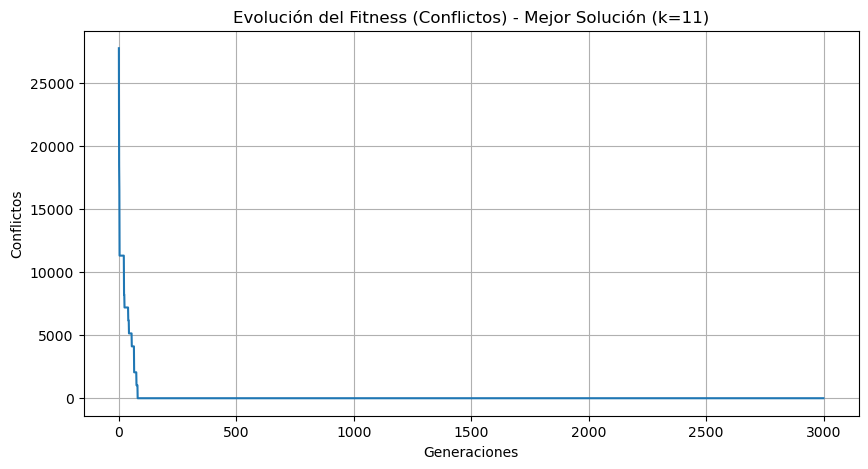

In [22]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.DataFrame(results)
display(df)

if best_overall_history:
    plt.figure(figsize=(10, 5))
    plt.plot(best_overall_history)
    plt.title(f"Evolución del Fitness (Conflictos) - Mejor Solución (k={min_k_global})")
    plt.xlabel("Generaciones")
    plt.ylabel("Conflictos")
    plt.grid(True)
    plt.show()

c:\Users\phili\Desktop\NEC\Activity2_NEC\src\utils.py:68: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


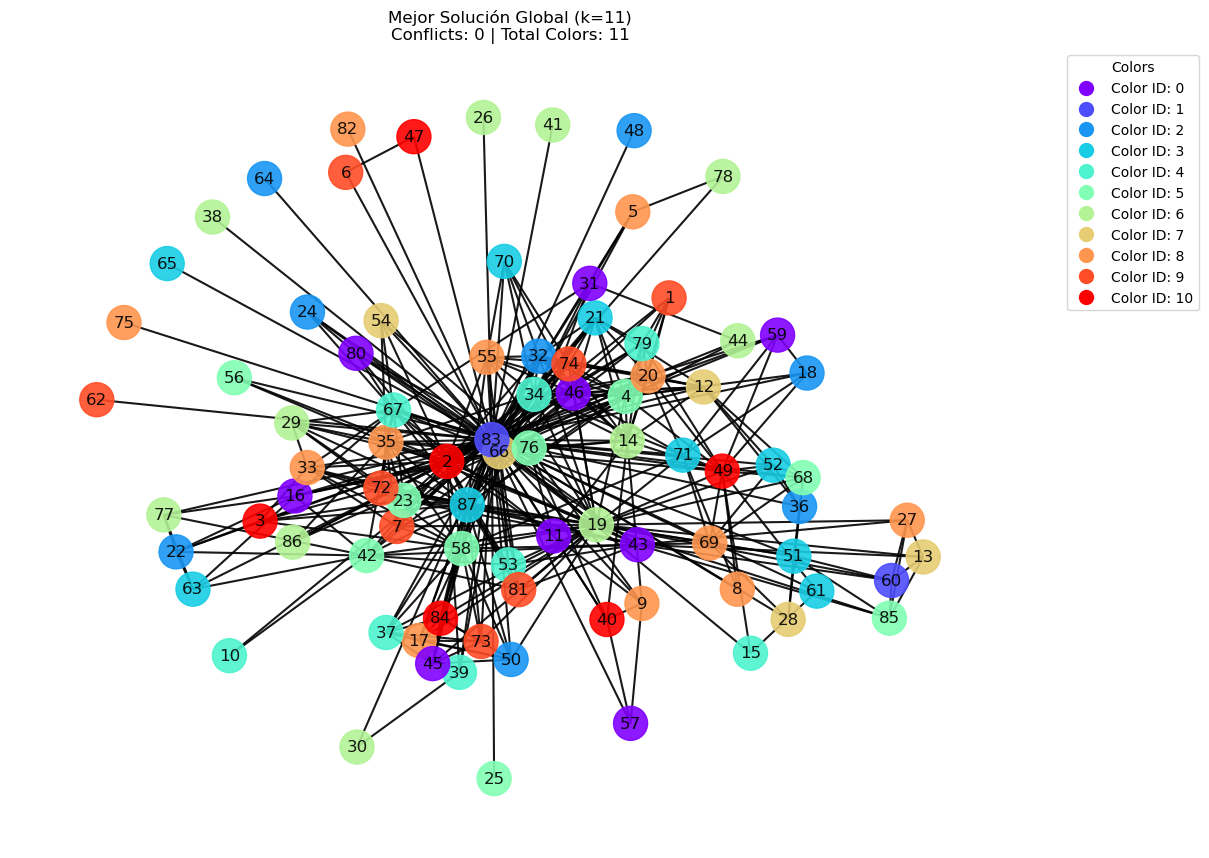

In [23]:
if best_solution_overall is not None:
    class ResultObj:
        def __init__(self, genes, conflicts): 
            self.genes = genes
            self.conflicts = conflicts 
    
    final_solution_obj = ResultObj(best_solution_overall, 0)
    
    plot_colored_graph(
        graph, 
        final_solution_obj, 
        title=f"Mejor Solución Global (k={min_k_global})"
    )
else:
    print("No se encontró ninguna solución válida en los experimentos.")